In [21]:
# coding: utf-8
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pylab as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.cm as cm 

#GP-UCB Code
class GPUCB(object):

  def __init__(self, meshgrid, environment, beta=100.):
    '''
    beta (optional): Hyper-parameter to tune the exploration-exploitation
    balance. If beta is large, it emphasizes the variance of the unexplored
    solution solution (i.e. larger curiosity)
    '''
    self.meshgrid = np.array(meshgrid)
    self.environment = environment
    self.beta = beta

    self.X_grid = self.meshgrid.reshape(self.meshgrid.shape[0], -1).T
    self.mu = np.array([0. for _ in range(self.X_grid.shape[0])])
    self.sigma = np.array([0.5 for _ in range(self.X_grid.shape[0])])
    self.X = []
    self.T = []

  def argmax_ucb(self):
    return np.argmax(self.mu + self.sigma * np.sqrt(self.beta))

  def learn(self):
    grid_idx = self.argmax_ucb()
    print grid_idx
    self.sample(self.X_grid[grid_idx])
    gp = GaussianProcessRegressor()
    gp.fit(self.X, self.T)
    self.mu, self.sigma = gp.predict(self.X_grid, return_std=True)

  def sample(self, x):
    t = self.environment.sample(x)
    self.X.append(x)
    self.T.append(t)

  def plot(self):
    
    fig = plt.figure(figsize=(18, 8))
    fig.suptitle("Iteration %02d" %len(self.X))
    
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_wireframe(self.meshgrid[0], self.meshgrid[1],
        self.mu.reshape(self.meshgrid[0].shape), alpha=0.5, color='g')
    ax.plot_wireframe(self.meshgrid[0], self.meshgrid[1],
        self.environment.sample(self.meshgrid), alpha=0.5, color='b')
    ax.scatter([x[0] for x in self.X], [x[1] for x in self.X], self.T, c='r',
        marker='o', alpha=1.0)
    ax1 = fig.add_subplot(1, 2, 2)
    ax1 = plt.subplot(122)
    ax1.pcolormesh(self.meshgrid[0], self.meshgrid[1],
        self.mu.reshape(self.meshgrid[0].shape))
  
    plt.savefig('fig_%02d.png' % len(self.X))




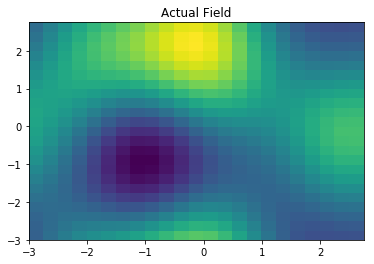

In [22]:
if __name__ == '__main__':
  class DummyEnvironment(object):
    def sample(self, j):
      return np.sinc(j[0])+np.sin(j[1]) - np.cos(j[0]-j[1]) + np.sin(j[0]+j[1])

  x = np.arange(-3, 3, 0.25)
  y = np.arange(-3, 3, 0.25)
  env = DummyEnvironment()
  agent = GPUCB(np.meshgrid(x, y), env)

  #Actual Field
  X, Y = np.meshgrid(x, y) 
  #Z = np.sinc(X)+ np.sin(Y)
  Z = np.sinc(X)+ np.sin(Y) + np.sin(X+Y) - np.cos(X-Y)
  plt.pcolormesh(X,Y,Z)
  plt.title("Actual Field")
  
  

Sampling Location 0 is
0
Sampling Location 1 is
575
Sampling Location 2 is
23
Sampling Location 3 is
552
Sampling Location 4 is
299
Sampling Location 5 is
288
Sampling Location 6 is
11
Sampling Location 7 is
563
Sampling Location 8 is
471
Sampling Location 9 is
463
Sampling Location 10 is
311
Sampling Location 11 is
136
Sampling Location 12 is
126
Sampling Location 13 is
330
Sampling Location 14 is
558
Sampling Location 15 is
191
Sampling Location 16 is
409
Sampling Location 17 is
317
Sampling Location 18 is
568
Sampling Location 19 is
431
Sampling Location 20 is
16
Sampling Location 21 is
144
Sampling Location 22 is
443
Sampling Location 23 is
6
Sampling Location 24 is
235
Sampling Location 25 is
514
Sampling Location 26 is
131
Sampling Location 27 is
374
Sampling Location 28 is
255
Sampling Location 29 is
475


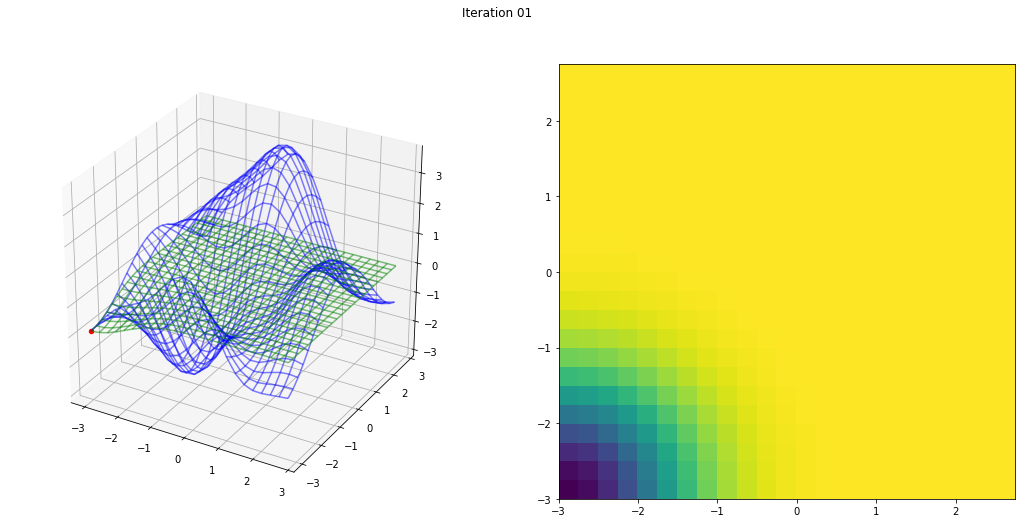

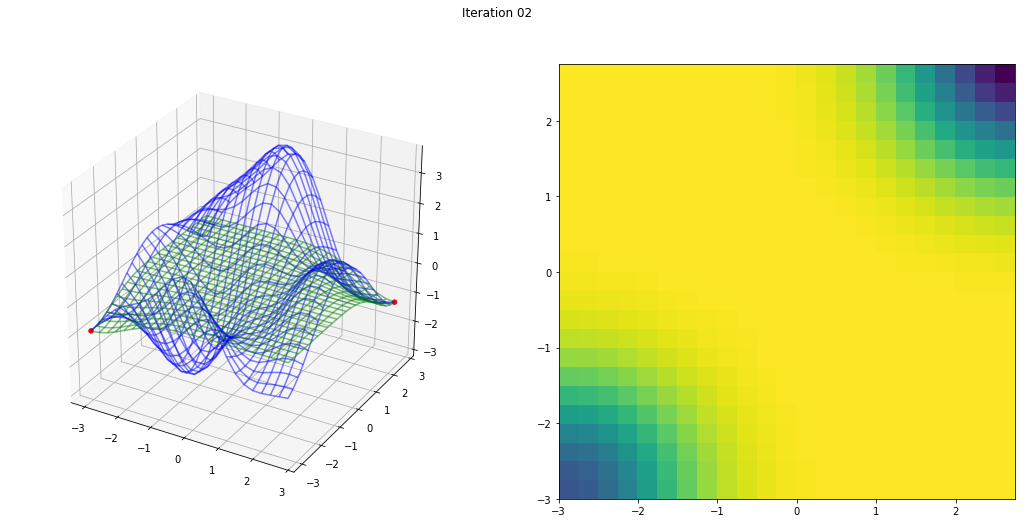

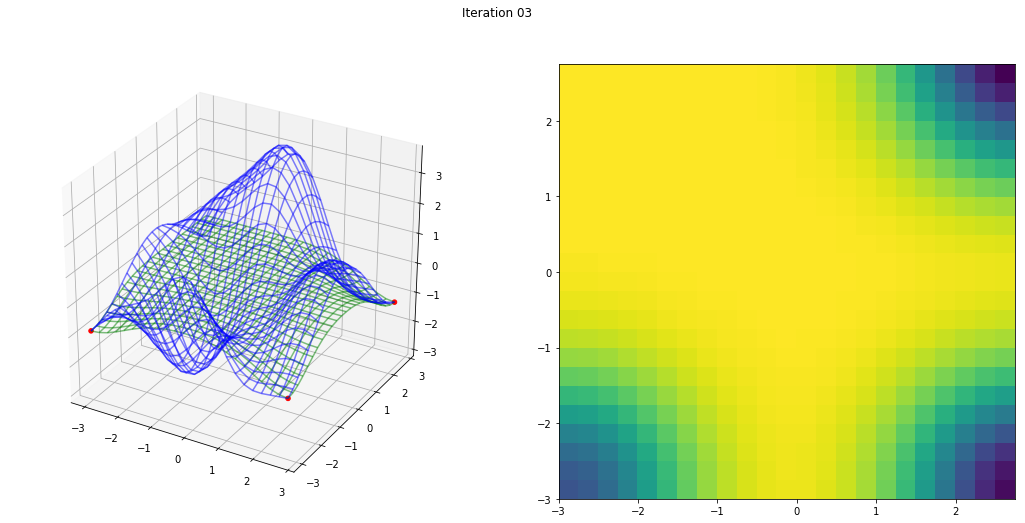

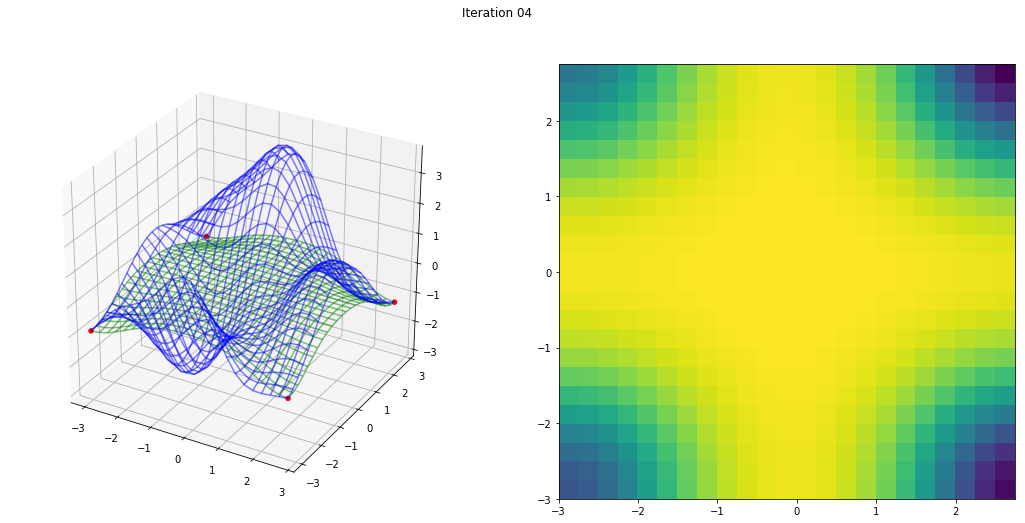

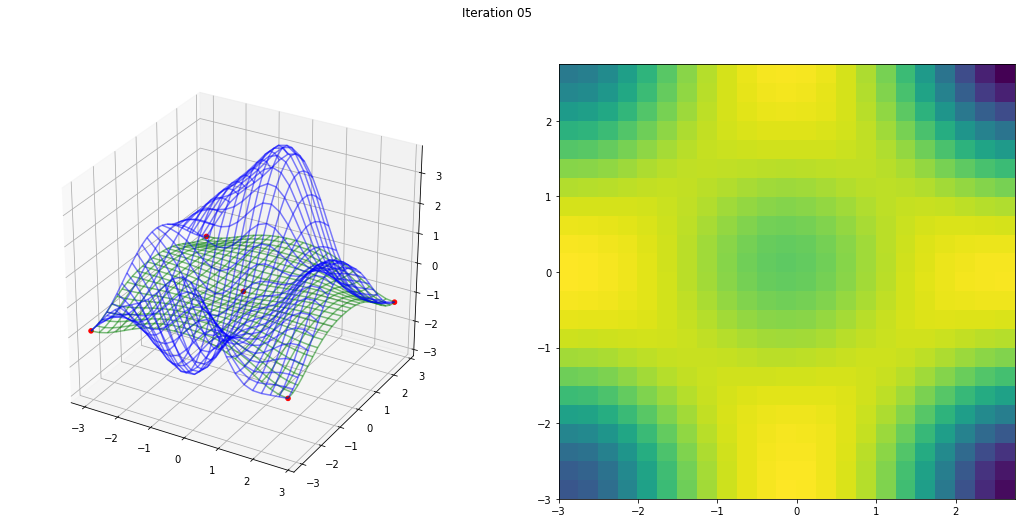

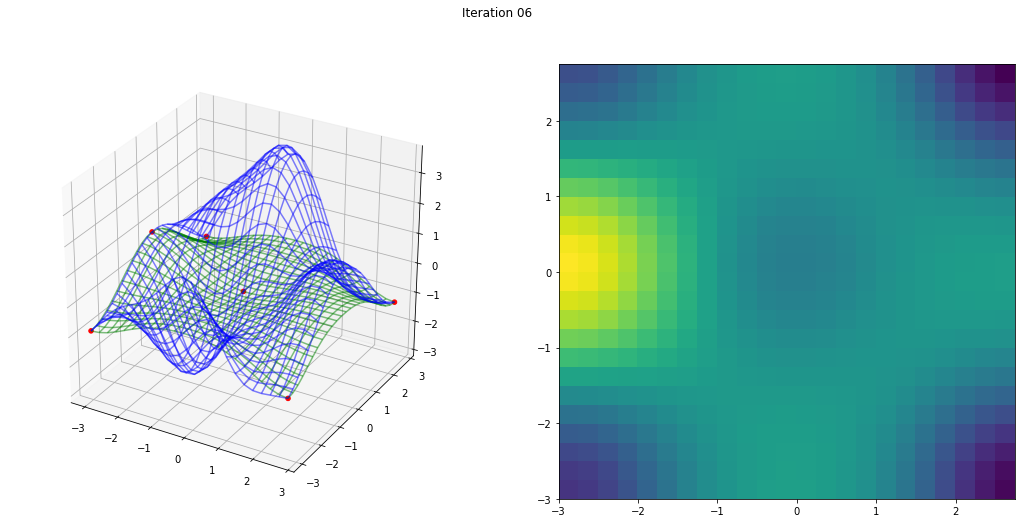

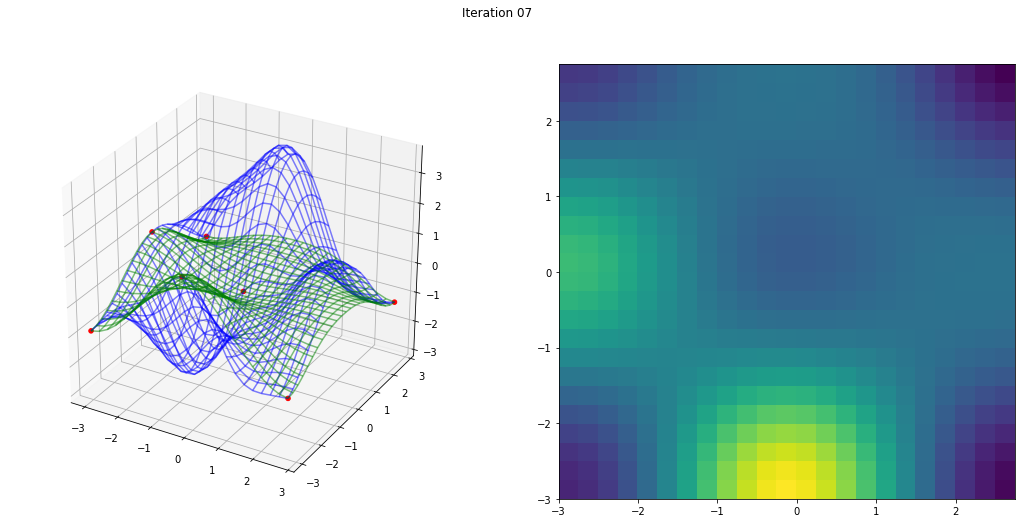

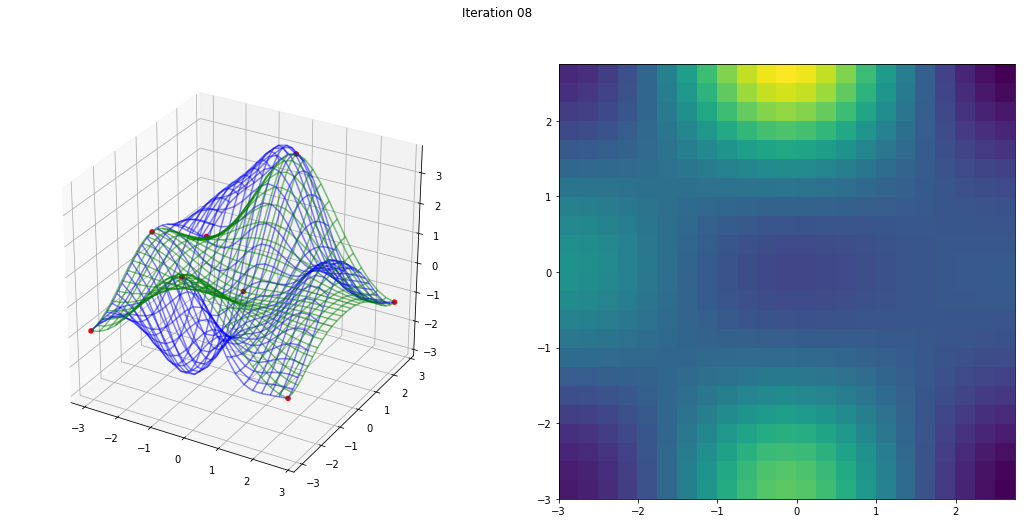

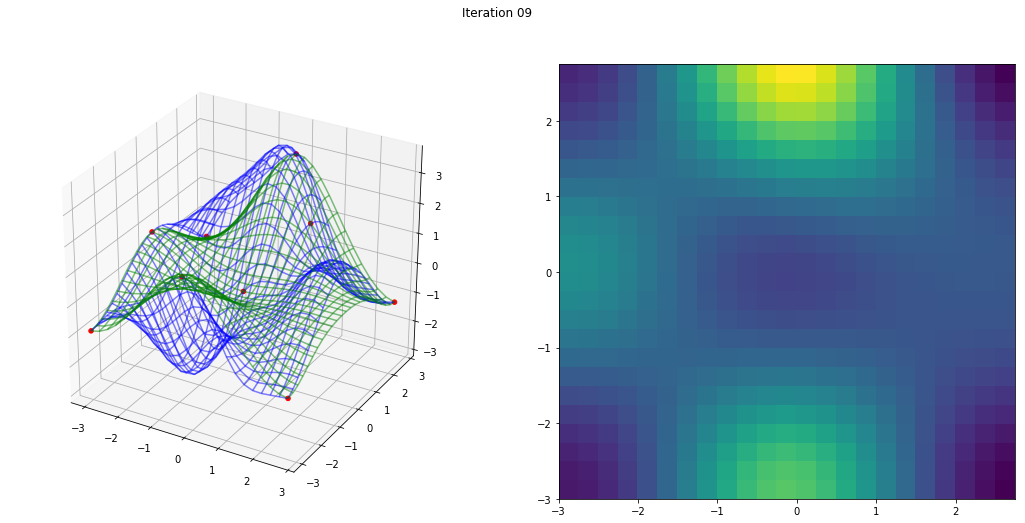

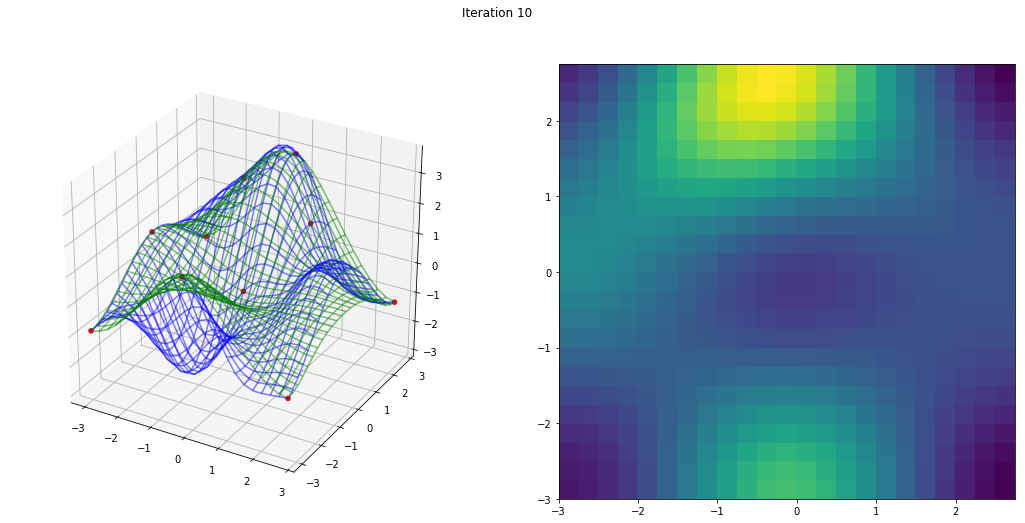

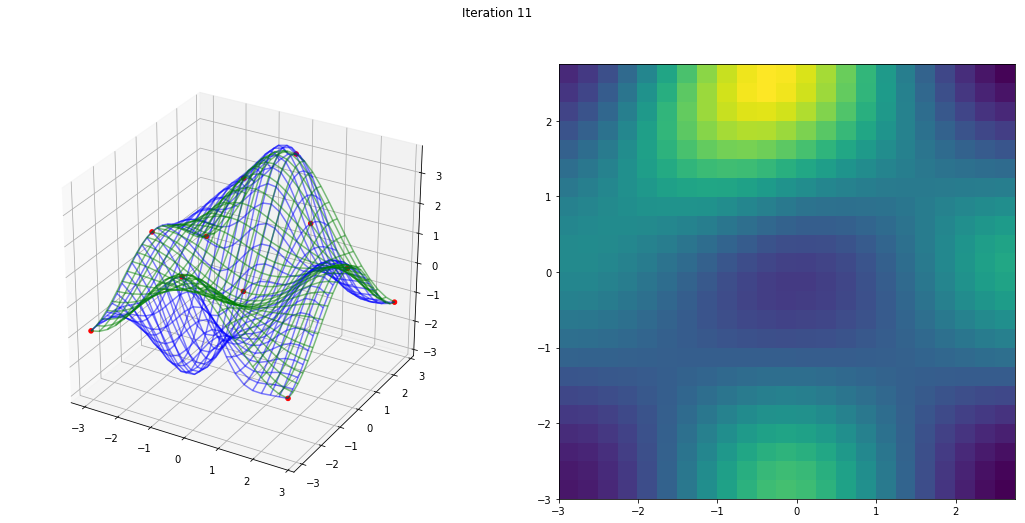

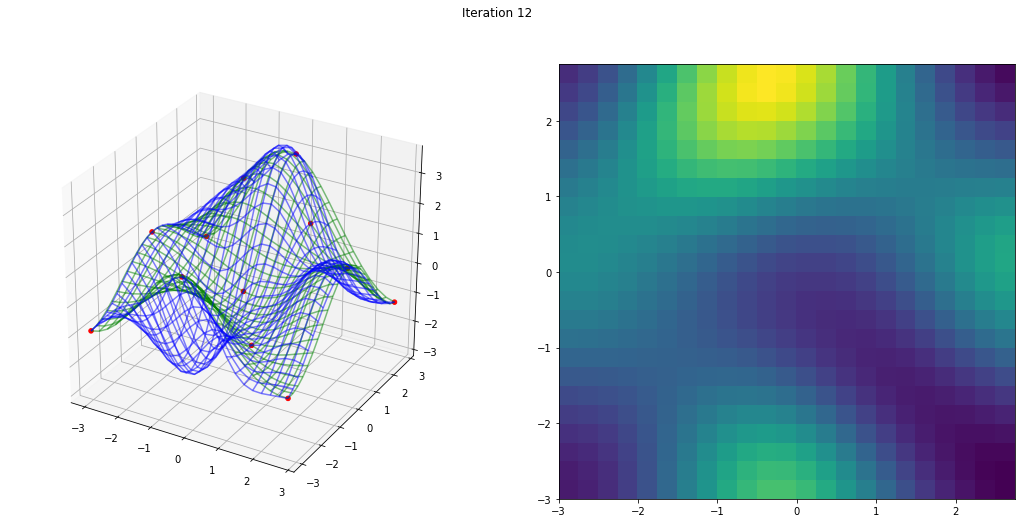

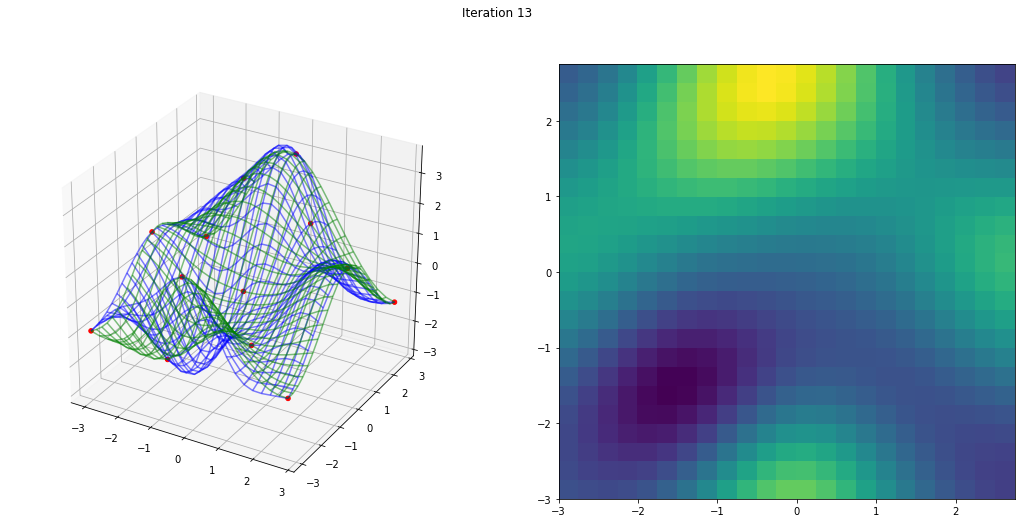

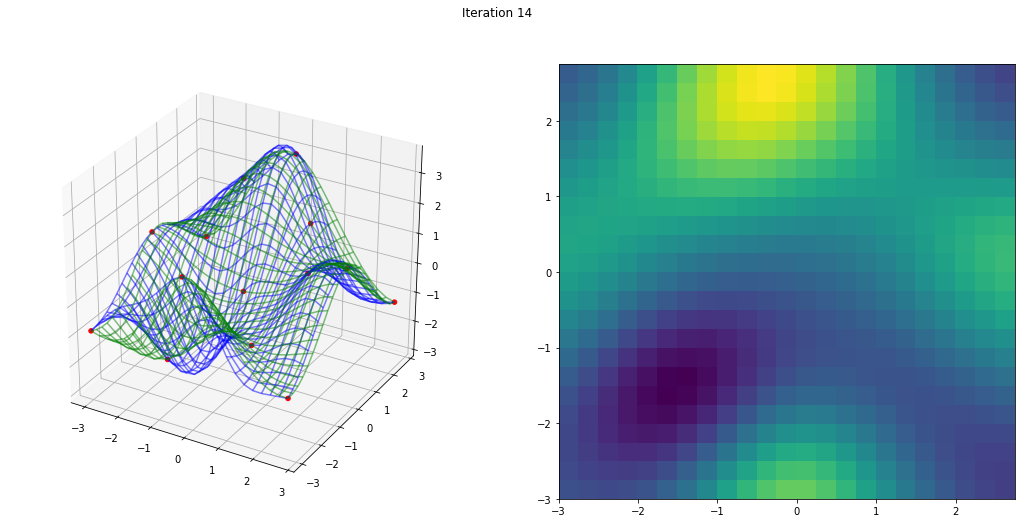

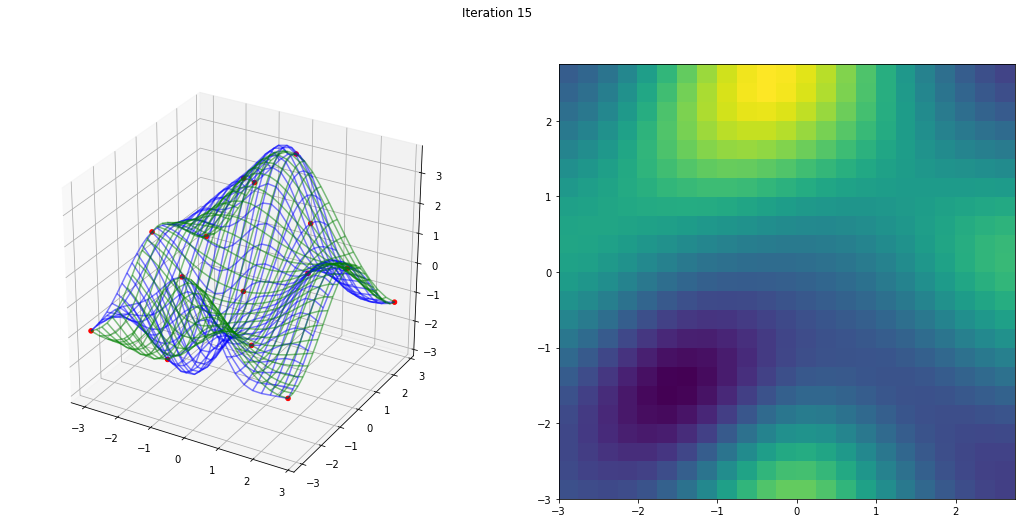

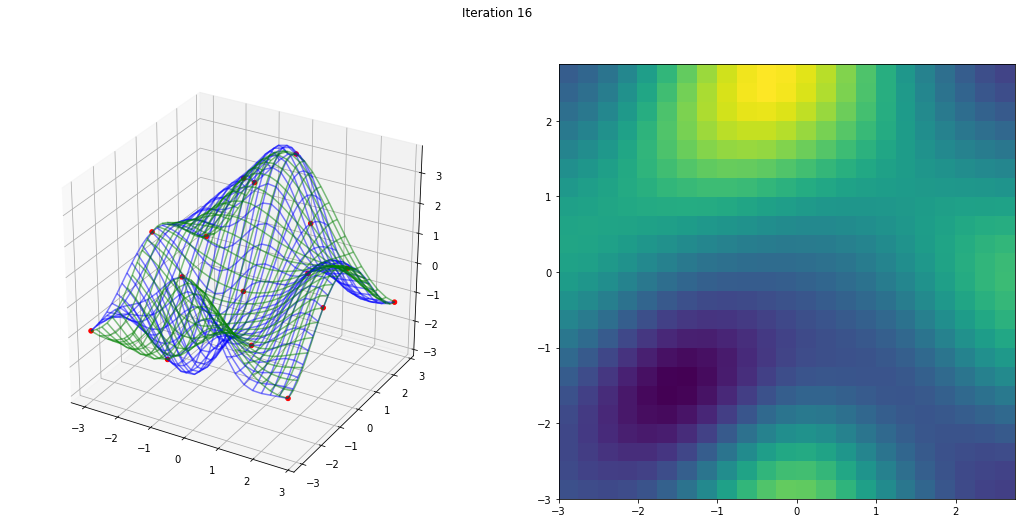

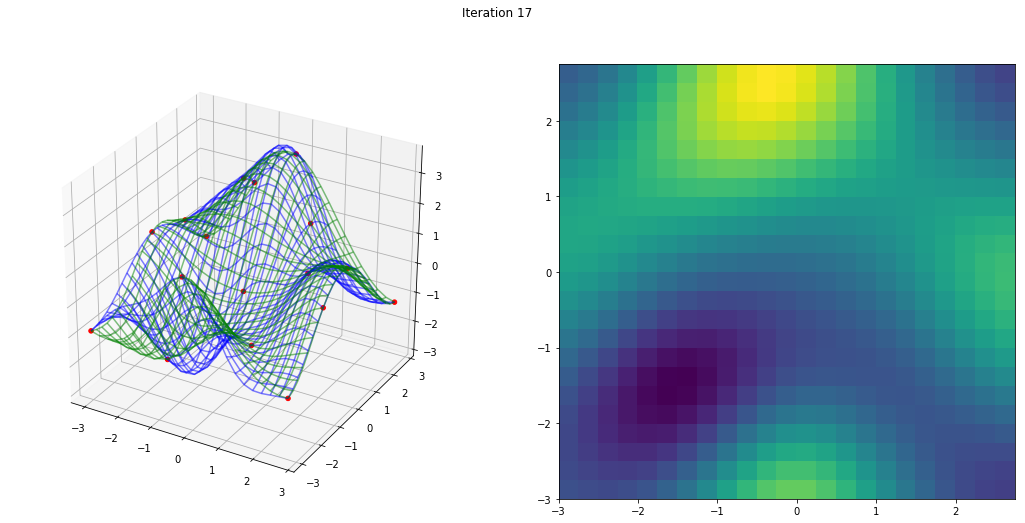

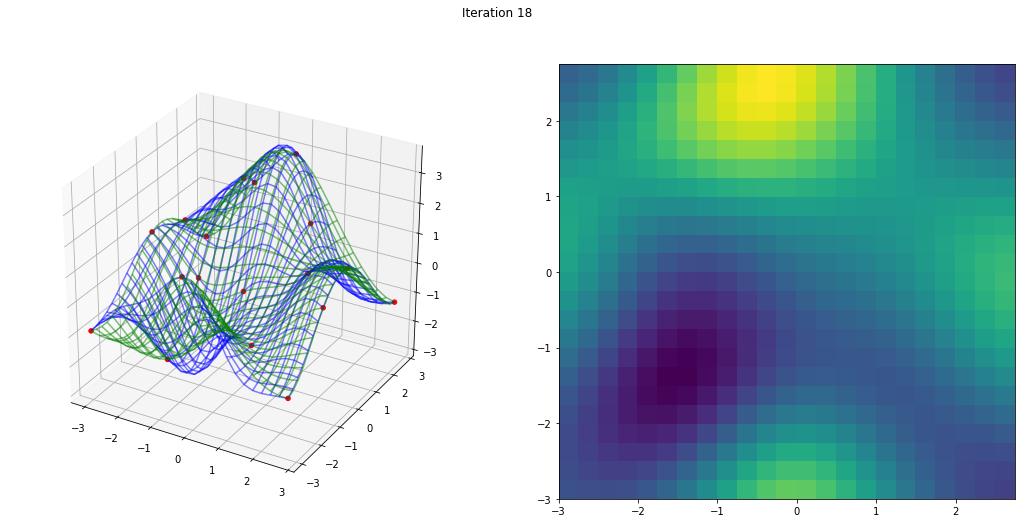

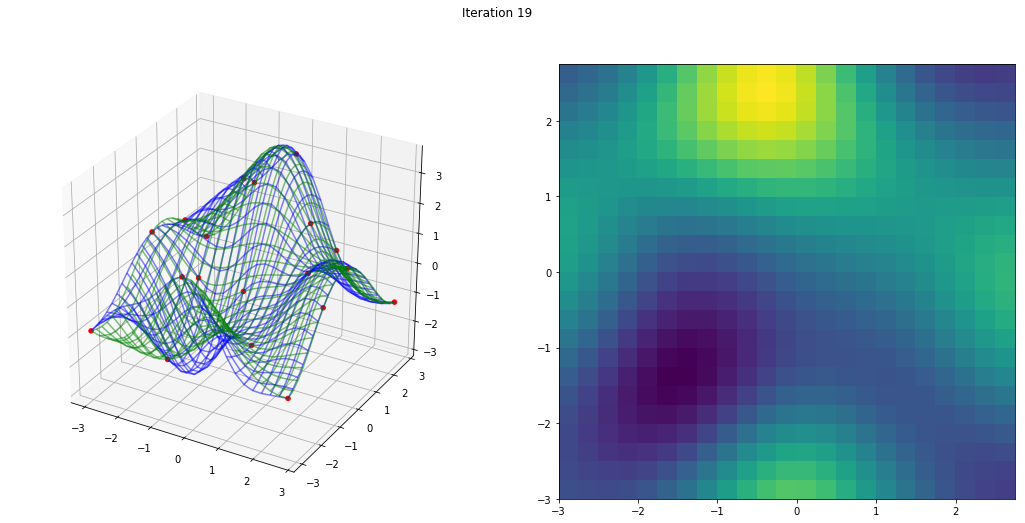

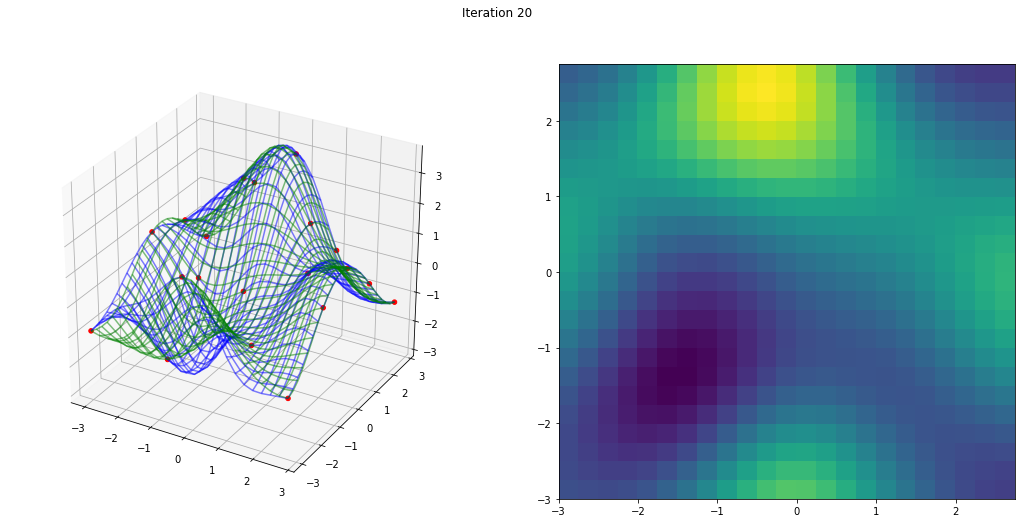

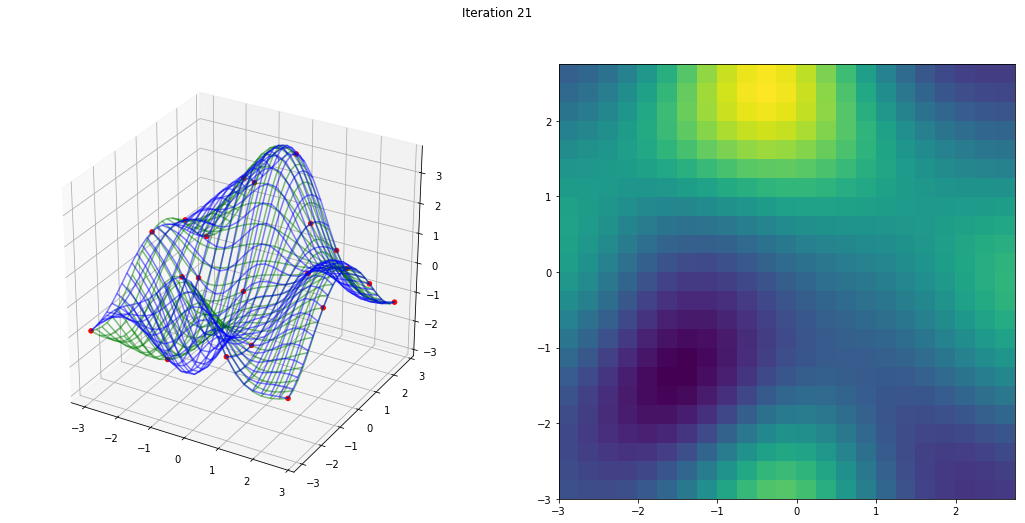

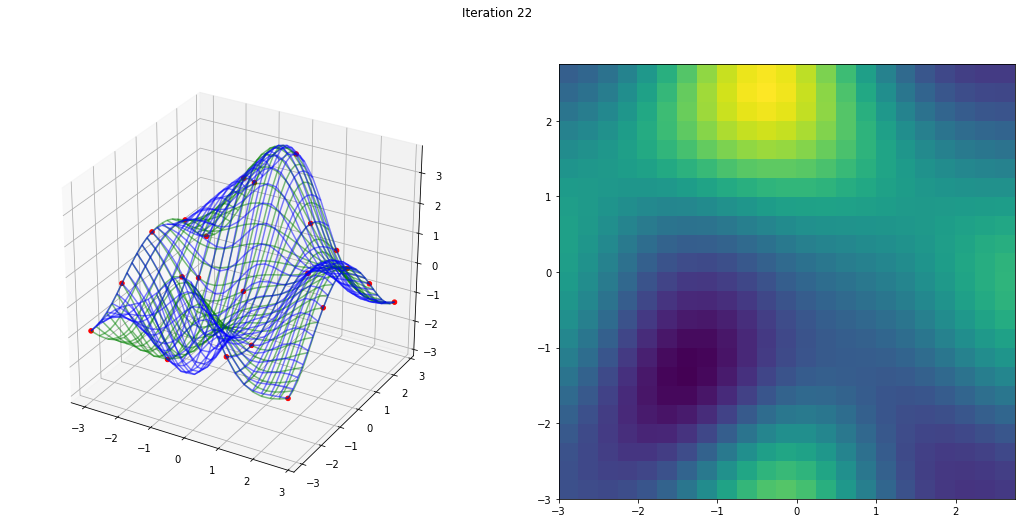

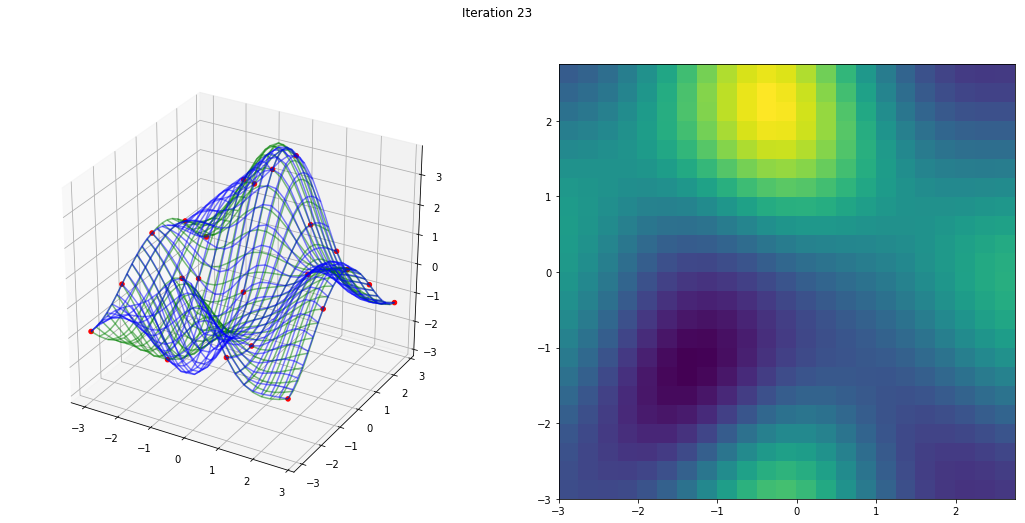

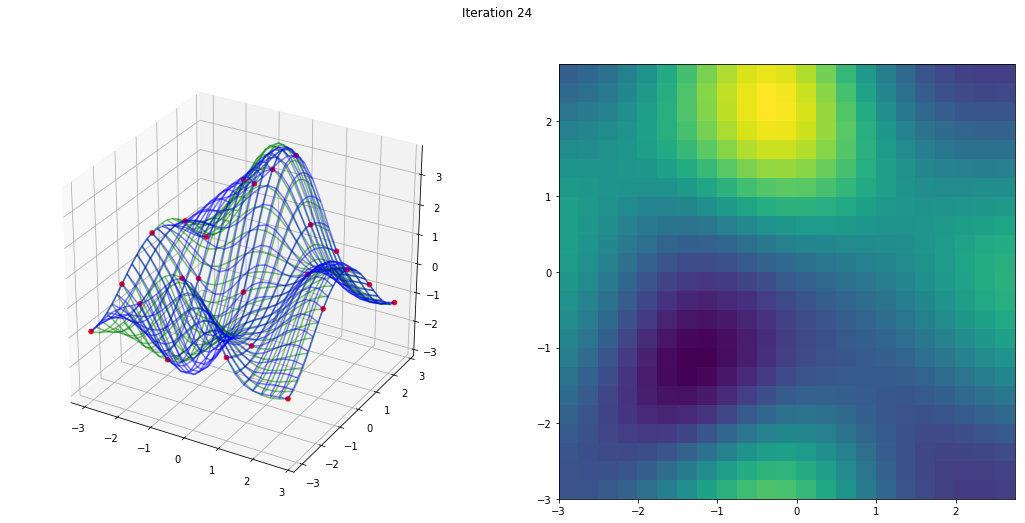

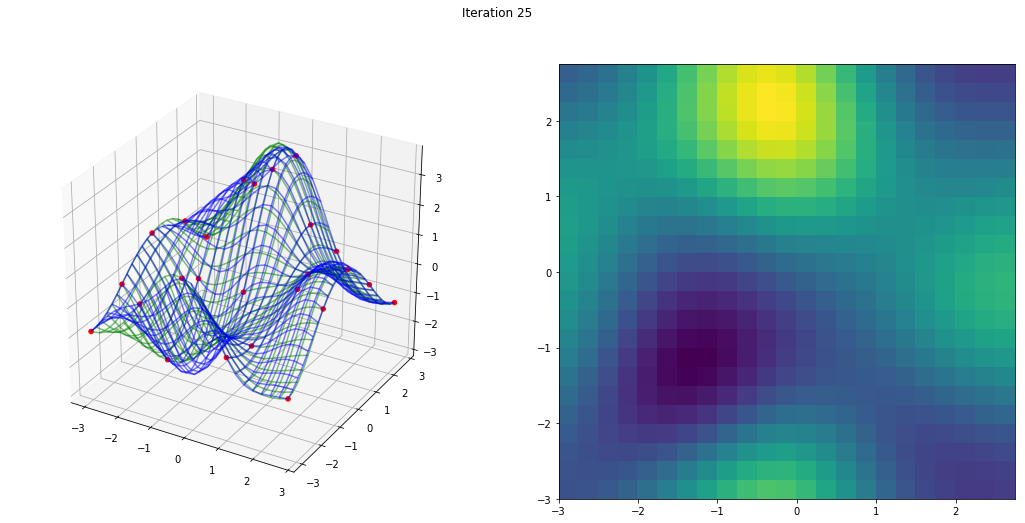

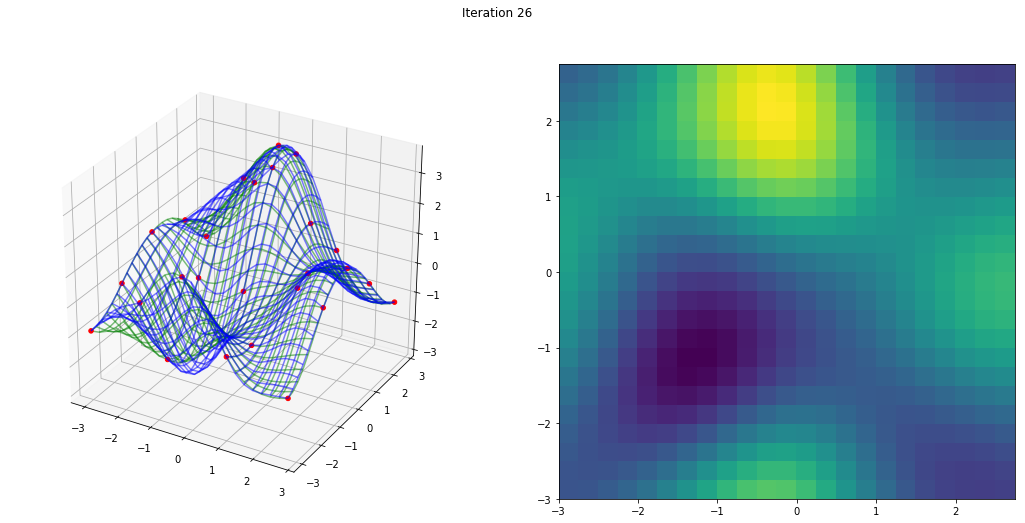

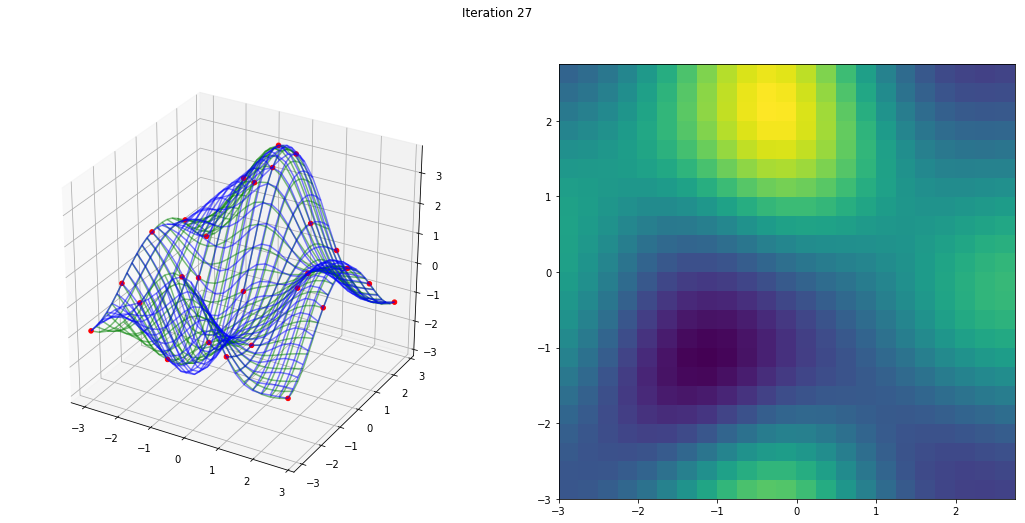

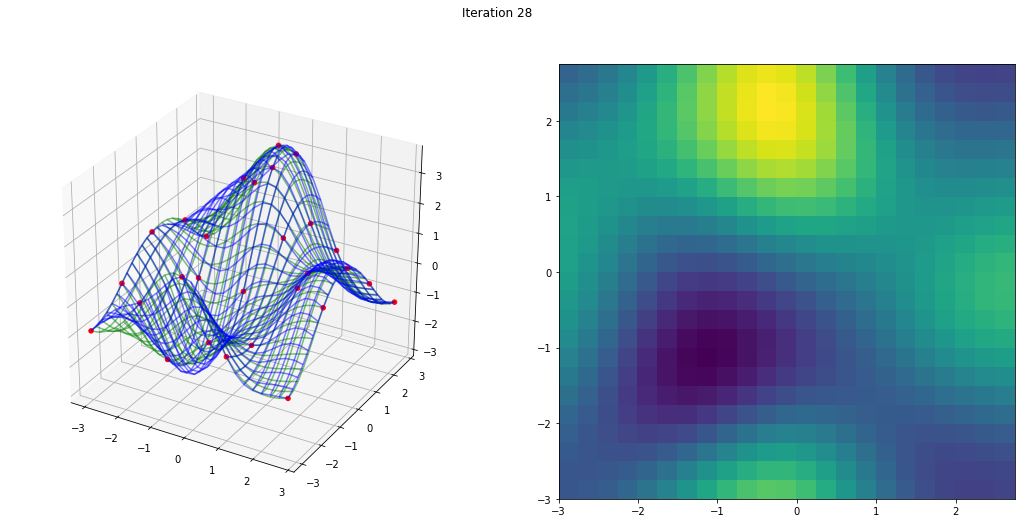

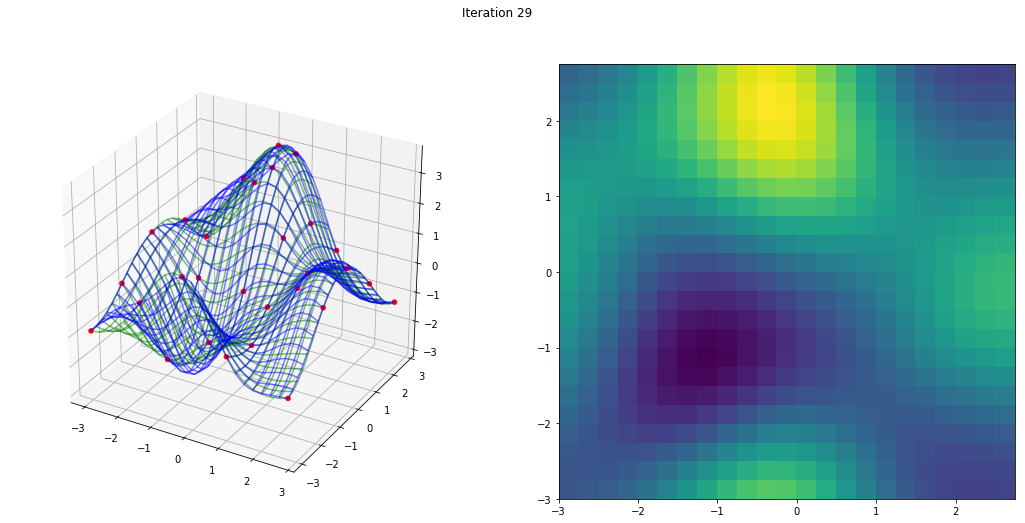

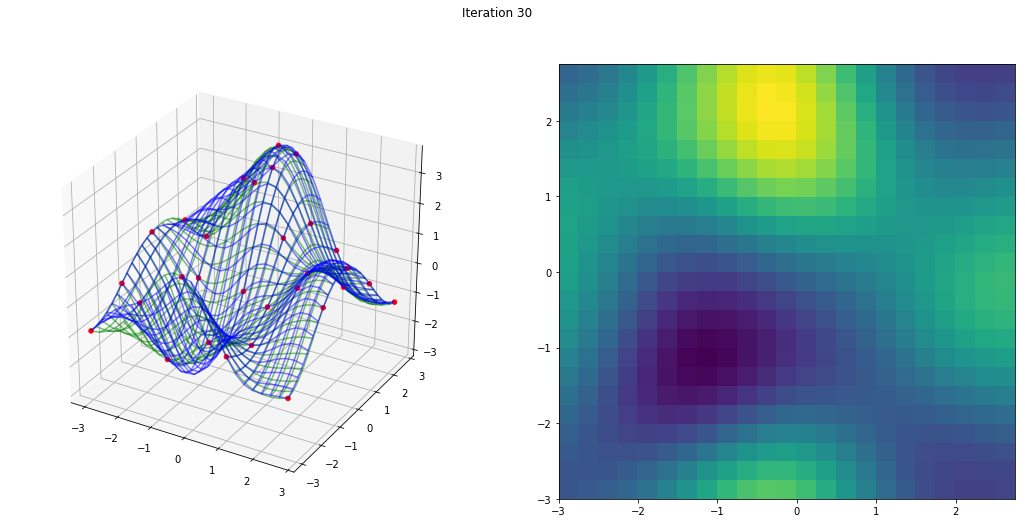

In [23]:
#Mapping the Field--
for i in range(30):
    print "Sampling Location "+ str(i) + " is" 
    agent.learn()
    agent.plot()